<a target="_blank" href="https://colab.research.google.com/github/swghosh/UG-Courses/blob/master/CSE3810/Function_Approximation_using_GRNN.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /><br>Run in Google Colab</a>

# Function Approximation

In [167]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

In [2]:
np.random.seed(28)

`f(x)` = `(x-10)(x-21)(x-47)(x-78)(x-89)`

In [217]:
x = np.linspace(0, 10, 500)

def f(x):
    a = 1.0 
    b = 2.1
    c = 4.7
    d = 7.8
    e = 8.9
    return (x - a) * (x - b) * (x - c) * (x - d) * (x - e)

y = f(x)

In [218]:
sns.set()
sns.set_style('whitegrid')

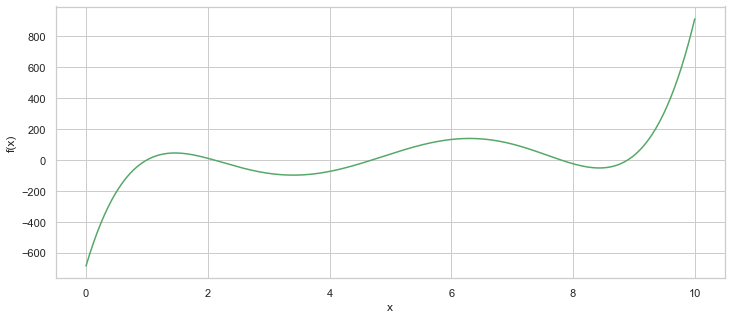

In [219]:
def plot_fn():
    plt.plot(x, y, 'g-')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
plt.figure(figsize=(12, 5))
plot_fn()
plt.show()

In [242]:
mean, stdev = np.mean(y), np.std(y)

In [241]:
X1 = np.linspace(0, 4, 100)
X2 = np.linspace(5.5, 9.5, 100)

In [243]:
X_train = np.concatenate([X1, X2])
rand = np.random.normal(mean, stdev / 6, size=X_train.shape)
y_train = f(X_train) + rand

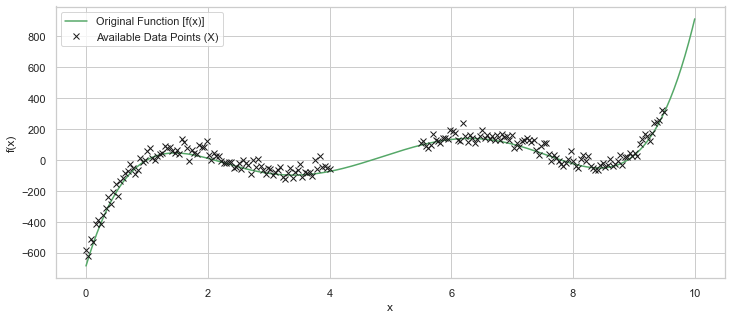

In [257]:
def plot_fn_and_data():
    plot_fn()
    plt.plot(X_train, y_train, 'kx')
    plt.legend(['Original Function [f(x)]', 'Available Data Points (X)'])

plt.figure(figsize=(12, 5))
plot_fn_and_data()
plt.show()

In [286]:
mlp = MLPRegressor(hidden_layer_sizes=(128, 256, 512, 1024), 
                   max_iter=1000)
X_train = X_train.reshape([-1, 1])
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 256, 512, 1024), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [287]:
x = x.reshape([-1, 1])
y_predict = mlp.predict(x)

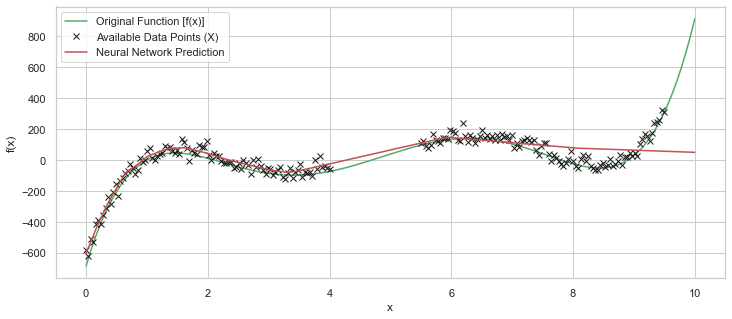

In [288]:
plt.figure(figsize=(12, 5))
plot_fn_and_data()
plt.plot(x, y_predict, 'r-')
plt.legend(['Original Function [f(x)]', 'Available Data Points (X)', 'Neural Network Prediction'])
plt.show()